<h4>How to plan an Interplantery Orbit</h4>


Generate a pork chop plot at the following link
http://sdg.aero.upm.es/index.php/online-apps/porkchop-plot
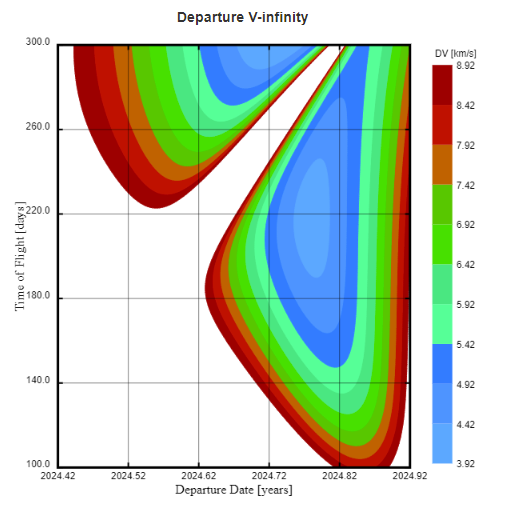

In [1]:
from pySTK import *
from AstroSat import *

# Initialize Scenario
stk = pySTK()
root = stk.Root()
startEpoch = '11 Oct 2024 00:00:00.000'
marsTest = stk.Scenario('marsTest',startEpoch,'+1yr')

# Add an Astrogator Satellite
sat1 = AstroSat('sat1',marsTest,root)

In [2]:
# Generate Planets and set 3D Viewer for Interplantery use
stk.InterplaneteryMode()
stk.SolarSystem()

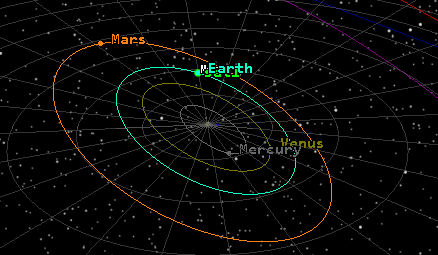

In [3]:
# Use Lambert Solver to generate interplantery arc
stk.InterplanetaryLambertSolver('MarsArc','Sun',
                                startEpoch,
                                '216 Days','Earth','Mars',
                                'Heliocentric',3,4,
                                'true','true')

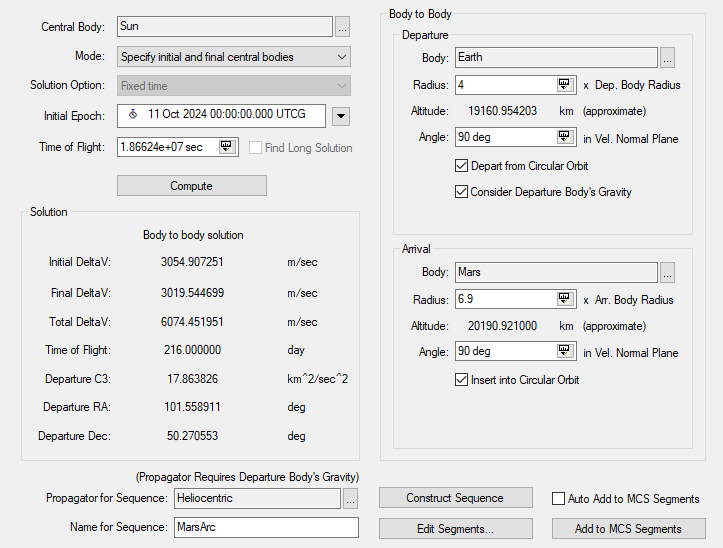

In [4]:
# Insert the MarsArc
MarsArc = sat1.insertSegmentByName('MarsArc')
sat1.runMCS()

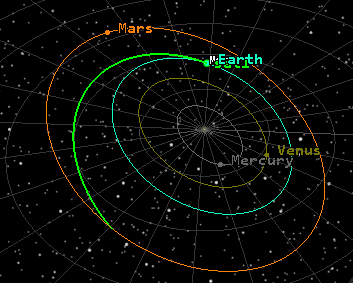

In [7]:
# Display Mars and propagate the Mars Ascending Node
stk.planetView('Mars')
sat1.PropagateAscendingNode('insert','Prop2AscendingNode','-','Mars','MarsPointMass')
sat1.runActiveProfileSequence('MarsArc','Target Sequence')
sat1.runActiveProfileSequenceOnce('MarsArc','Target Sequence')

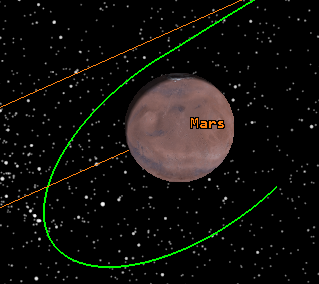